# 300_Analysis

## Purpose

In this notebook we will take our fourth research question and begin the analysis of the fourth research question. Which is "What month has the highest release rate and does this correlate with overall sales and performance of a game". In this notebook what we will analyse is 
- yearly sales
- monthly sales across each year
- monthly sales combined 
- genres by region 
- Average game sales 
- Average game reviews
- top 5 games do they always come out in the highest month
- correlation between global sales and scores by month and year
- correlation between global sales and games releases by year

### Datasets

- Input : Clean_Combined.pkl && Clean_Game_Sales_Total.pkl
- Output : N/A

In [1]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt 

%matplotlib inline 

In [2]:
# check if the datasets exists otherwise error produced
if not os.path.exists("../../data/prep/Clean_Combined.pkl"):
    print("Missing Dataset File")

In [3]:
# Check if the datasets exists otherwise error prodced
if not os.path.exists("../../data/prep/Clean_Games_Sales_Total.pkl"):
    print("Missing Dataset File")

## Analysis 

Let's begin with the analysis to see what month had the highest release rate. 

In [4]:
# check the dataset exists and check it loads using .shape 
combined = pd.read_pickle("../../data/prep/Clean_Combined.pkl")
combined.shape

(6434, 12)

In [5]:
# print the first 5 lines
combined.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,score_phrase,score,editors_choice
Date,,,,,,,,,,,,
2006-11-13,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Good,7.5,N
2008-04-20,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Great,8.5,Y
2009-07-16,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Good,7.7,N
2006-05-06,New Super Mario Bros.,DS,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,Amazing,9.5,Y
2009-11-13,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,Great,8.9,Y


In [6]:
# check dataset loads in using .shape
sales = pd.read_pickle("../../data/prep/Clean_Games_Sales_Total.pkl")
sales.shape

(16444, 11)

In [7]:
# first 5 lines of the loaded in dataset 
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


### Monthly Analysis 

For the monthly analysis we will be analysing the combined data as this one contains the monthly details of each game. We will have to split the information by year more than likely and then one we have it in the year format we will be able to split it into the monthly format. 

In [8]:
# Here we are resample by the business year end. To calculate the yearly releases.
combined['Platform'].resample("BA").count()

Date
1996-12-31     43
1997-12-31    120
1998-12-31    141
1999-12-31    210
2000-12-29    259
2001-12-31    219
2002-12-31    405
2003-12-31    429
2004-12-31    415
2005-12-30    455
2006-12-29    417
2007-12-31    554
2008-12-31    741
2009-12-31    581
2010-12-31    382
2011-12-30    348
2012-12-31    232
2013-12-31    208
2014-12-31    144
2015-12-31     84
2016-12-30     47
Freq: BA-DEC, Name: Platform, dtype: int64

As seen above again we get 2008 as our highest year in terms of Platform releases with a total of 741 platforms during that year. 

In [9]:
# Then we will resample by months for each year
gamestotal_bymonth = combined['Platform'].resample("M").count()
gamestotal_bymonth.head()

Date
1996-09-30     2
1996-10-31     0
1996-11-30    31
1996-12-31    10
1997-01-31    10
Freq: M, Name: Platform, dtype: int64

As seen above we have analysed on a monthly basis for each year and calculated the number of publishers per year and then divided it per month for that year. What we would like to do now is count the total amount of publishers for each month over the 20 years. This will help us tell which month has the highest release rate because it will group by the publishers. 

In [10]:
# Then we will use strftime to convert the index column into full month names as a string. 
# Gotten from stack overflow: "https://stackoverflow.com/questions/49896920/pandas-yearly-analyses-and-then-by-month".
combined.groupby(combined.index.strftime('%B'))['Publisher'].count()

April         354
August        413
December      479
February      453
January       286
July          266
June          460
March         594
May           348
November     1101
October      1005
September     674
Name: Publisher, dtype: int64

As seen above November has the highest release rate in terms of publishers which is interesting as this is a good month financially to release a game as this is the month before christmas, meaning more people will be buying games at this time of the year.

### Analysing Monthly Sales across Regions

As above we will now divide the data into our 4 regions. Eu , Japan, Global and North American sales. We will again divide everything up into business end years, months by year and then convert it into full month names and count the highest month name in terms of sale for that region. 

###### NA_Sales

In [11]:
# resample the north american sales to business year end and sum the sales for each year
combined['NA_Sales'].resample("BA").sum()

Date
1996-12-31     30.44
1997-12-31     60.15
1998-12-31     67.21
1999-12-31     95.03
2000-12-29     78.30
2001-12-31     99.94
2002-12-31    138.82
2003-12-31    125.08
2004-12-31    147.29
2005-12-30    125.45
2006-12-29    182.76
2007-12-31    224.38
2008-12-31    268.09
2009-12-31    242.62
2010-12-31    185.96
2011-12-30    168.94
2012-12-31    120.91
2013-12-31    115.54
2014-12-31     55.05
2015-12-31     35.50
2016-12-30     13.99
Freq: BA-DEC, Name: NA_Sales, dtype: float64

In [12]:
# resample the north american sales by month for each year 
NA_bymonth = combined['NA_Sales'].resample("M").sum()
NA_bymonth.head()

Date
1996-09-30     7.47
1996-10-31      NaN
1996-11-30    16.52
1996-12-31     6.45
1997-01-31     4.75
Freq: M, Name: NA_Sales, dtype: float64

In [13]:
# convert the string into a full month name and get a total overview for the best selling month in North America
combined.groupby(combined.index.strftime('%B'))['NA_Sales'].sum()

April        112.34
August       187.00
December     132.98
February     127.96
January       83.36
July          88.11
June         127.52
March        168.71
May          136.50
November     679.61
October      446.35
September    291.01
Name: NA_Sales, dtype: float64

As we can see November is the highest selling month in north america followed by octover and september. The worst months to release a game is january and july. 

##### EU_Sales

Now lets analyse the European yearly sales, sales by year and the highest overall month 

In [14]:
# Resample by business year end to find the sum of the sales for each year
combined['EU_Sales'].resample("BA").sum()

Date
1996-12-31     13.82
1997-12-31     26.24
1998-12-31     30.52
1999-12-31     44.35
2000-12-29     41.78
2001-12-31     51.91
2002-12-31     69.24
2003-12-31     70.77
2004-12-31     71.34
2005-12-30     53.30
2006-12-29     94.25
2007-12-31    110.47
2008-12-31    141.06
2009-12-31    137.81
2010-12-31    114.68
2011-12-30    115.47
2012-12-31     92.15
2013-12-31     91.85
2014-12-31     61.47
2015-12-31     40.66
2016-12-30     17.85
Freq: BA-DEC, Name: EU_Sales, dtype: float64

In [15]:
# get the sales by monthly basis for each year
EU_bymonth = combined['EU_Sales'].resample("M").sum()
EU_bymonth.head()

Date
1996-09-30    3.09
1996-10-31     NaN
1996-11-30    8.38
1996-12-31    2.35
1997-01-31    1.34
Freq: M, Name: EU_Sales, dtype: float64

In [16]:
# convert the string to a full month name and find the highest sold months
combined.groupby(combined.index.strftime('%B'))['EU_Sales'].sum()

April         70.71
August        72.50
December      79.14
February      74.73
January       43.76
July          39.82
June          82.23
March         93.76
May           93.77
November     410.05
October      249.14
September    181.38
Name: EU_Sales, dtype: float64

As we can see we resampled by month by year, yearly and then by full month to see what month had the highest sold months. We can see November and October and September again dominates the highest sold months. 


##### JP_Sales

Now we will analyse the japanese market and check the sales by business year, then by month for each year, and then by full month names. 

In [17]:
# Japanese sales by business year
combined['JP_Sales'].resample("BA").sum()

Date
1996-12-31     7.11
1997-12-31    16.17
1998-12-31    16.40
1999-12-31    21.72
2000-12-29    23.42
2001-12-31    16.45
2002-12-31    13.54
2003-12-31    13.43
2004-12-31     9.89
2005-12-30    23.30
2006-12-29    38.94
2007-12-31    28.74
2008-12-31    33.28
2009-12-31    29.22
2010-12-31    24.60
2011-12-30    20.84
2012-12-31    18.74
2013-12-31    19.81
2014-12-31    14.12
2015-12-31    11.22
2016-12-30     3.06
Freq: BA-DEC, Name: JP_Sales, dtype: float64

In [18]:
# check the monthly sales by year 
JP_bymonth = combined['JP_Sales'].resample("M").sum()
JP_bymonth.head()

Date
1996-09-30    2.21
1996-10-31     NaN
1996-11-30    3.97
1996-12-31    0.93
1997-01-31    0.03
Freq: M, Name: JP_Sales, dtype: float64

In [19]:
# convert to a full month name to check highest sold months 
combined.groupby(combined.index.strftime('%B'))['JP_Sales'].sum()

April        20.89
August       23.30
December     23.11
February     32.67
January      12.01
July         17.16
June         21.64
March        40.66
May          30.51
November     90.67
October      45.22
September    46.16
Name: JP_Sales, dtype: float64

As we can see again November , October and September again dominate the highest sold months in the japanese regions

##### Global Sales

Check the Global sales by business year, months by year and by full month names

In [20]:
# Check the yearly sales figures
globally = combined['Global_Sales'].resample("BA").sum()
globally.head()

Date
1996-12-31     53.28
1997-12-31    107.31
1998-12-31    118.91
1999-12-31    168.00
2000-12-29    151.59
Freq: BA-DEC, Name: Global_Sales, dtype: float64

In [21]:
# check the monthly sales by year
global_bymonth = combined['Global_Sales'].resample("M").sum()
global_bymonth.head()

Date
1996-09-30    13.01
1996-10-31      NaN
1996-11-30    30.16
1996-12-31    10.11
1997-01-31     6.38
Freq: M, Name: Global_Sales, dtype: float64

In [22]:
# check the sales for each month 
combined.groupby(combined.index.strftime('%B'))['Global_Sales'].sum()

April         224.97
August        309.55
December      257.19
February      270.50
January       152.54
July          158.69
June          256.77
March         336.30
May           289.56
November     1309.46
October       839.92
September     579.40
Name: Global_Sales, dtype: float64

November , October and September are the top selling regions as seen above globally. They are also the top selling months for each separate region. The trend is the same across each region. 

#### Getting average of game sales released per month 

What we want to do now is calculate the total global sales for each month. We then need to calculate the number of games released per month. Once we have both of these we will need to divide the global sales per month by the games per month to find the average. 

In [23]:
# count the number of games released per month 
games_by_month = combined.groupby(combined.index.strftime('%B'))['Genre'].count()
games_by_month 

April         354
August        413
December      479
February      453
January       286
July          266
June          460
March         594
May           348
November     1102
October      1005
September     674
Name: Genre, dtype: int64

In [24]:
# sum the global sales for each month 
Global = combined.groupby(combined.index.strftime('%B'))['Global_Sales'].sum()
Global

April         224.97
August        309.55
December      257.19
February      270.50
January       152.54
July          158.69
June          256.77
March         336.30
May           289.56
November     1309.46
October       839.92
September     579.40
Name: Global_Sales, dtype: float64

Average of global sales divided by the number of releases that month. This represents on average the sales per month. As seen below the best month in terms of sales is November

In [25]:
# divide the global sales by the number of games released each month to get an average release per month
avg_games = Global / games_by_month
avg_games

April        0.635508
August       0.749516
December     0.536931
February     0.597130
January      0.533357
July         0.596579
June         0.558196
March        0.566162
May          0.832069
November     1.188258
October      0.835741
September    0.859644
dtype: float64

#### Monthly Score review

Lets analyse the average score per month. We have already stored the amount of games per month. Now lets sum the total scores per month. Once we get this we will divide the total score figure by the number of releases per month. 

In [26]:
# find the highest scored month 
month = combined.groupby(combined.index.strftime('%B'))['score'].sum()
month

April        2389.2
August       2987.7
December     3026.8
February     3261.4
January      1897.6
July         1823.3
June         3192.7
March        4230.0
May          2365.4
November     7844.3
October      7207.2
September    5062.1
Name: score, dtype: float64

In [27]:
# get the average score by dividing the monthly scores by the number of releases to find the average score per month 
month / games_by_month 

April        6.749153
August       7.234140
December     6.318998
February     7.199558
January      6.634965
July         6.854511
June         6.940652
March        7.121212
May          6.797126
November     7.118240
October      7.171343
September    7.510534
dtype: float64

As we can see we have divided our total scores for each month which is stored in a dataframe called month. We will then divide this by the dataframe called c which will give us the average rating per month. From the analysis above on average September has the highest rated average which is interesting to note as November has been at the highest for all of our other analysis. 

### Genre by Regions

Checking the performance of genre in each region in terms of sales and both in terms of reviews. We will  calculate the highest sold genres in each region and see if there is much of a difference in them. 

#### Number 1 genre in EU

In [28]:
# Finding the number 1 genre in EU
combined.groupby(['Genre'], sort = False)['EU_Sales'].max()


Genre
Sports          28.96
Racing          12.76
Platform         9.14
Action           9.09
Misc             9.20
Puzzle           5.35
Shooter          5.73
Fighting         2.55
Simulation       6.42
Role-Playing     6.21
Adventure        2.00
Strategy         1.89
Name: EU_Sales, dtype: float64

#### Number 1 genre Japan

In [29]:
# finding the numbe 1 genre in Japan 
combined.groupby(['Genre'], sort = False)['JP_Sales'].max()


Genre
Sports          3.77
Racing          4.13
Platform        6.50
Action          1.54
Misc            4.16
Puzzle          5.32
Shooter         1.46
Fighting        2.66
Simulation      5.33
Role-Playing    4.35
Adventure       1.06
Strategy        0.94
Name: JP_Sales, dtype: float64

#### Number 1 genre Globally

In [30]:
# best selling genre globally
combined.groupby(['Genre'], sort = False)['Global_Sales'].max()
 

Genre
Sports          82.53
Racing          35.52
Platform        29.80
Action          21.04
Misc            20.15
Puzzle          15.29
Shooter         14.73
Fighting        12.84
Simulation      12.13
Role-Playing     9.72
Adventure        5.54
Strategy         5.45
Name: Global_Sales, dtype: float64

#### Number 1 genre North America

In [31]:
# best selling genre in north america
combined.groupby(['Genre'], sort = False)['NA_Sales'].max()


Genre
Sports          41.36
Racing          15.68
Platform        14.44
Action           9.66
Misc             5.95
Puzzle           3.43
Shooter          9.70
Fighting         6.62
Simulation       3.07
Role-Playing     5.05
Adventure        3.28
Strategy         3.18
Name: NA_Sales, dtype: float64

As we can see above the genres for each region are similar enough except for Japan. In each other region it is the sports region which is at it's highest. However for japan it is the platform genre which performed best. 

#### Highest scored genre

In [32]:
# the highest scored genre that are scored
combined.groupby(['Genre'], sort = False)['score'].max()

Genre
Sports           9.7
Racing           9.8
Platform        10.0
Action          10.0
Misc             9.7
Puzzle           9.1
Shooter          9.8
Fighting         9.6
Simulation       9.6
Role-Playing     9.9
Adventure        9.7
Strategy         9.7
Name: score, dtype: float64

In [33]:
# highest sold game globally 
combined.groupby(['Name'], sort=False)['Global_Sales'].max()

Name
Wii Sports                                       82.53
Mario Kart Wii                                   35.52
Wii Sports Resort                                32.77
New Super Mario Bros.                            29.80
New Super Mario Bros. Wii                        28.32
Mario Kart DS                                    23.21
Wii Fit                                          22.70
Wii Fit Plus                                     21.79
Grand Theft Auto V                               21.04
Grand Theft Auto: San Andreas                    20.81
Brain Age: Train Your Brain in Minutes a Day     20.15
Grand Theft Auto: Vice City                      16.15
Brain Age 2: More Training in Minutes a Day      15.29
Call of Duty: Modern Warfare 3                   14.73
Call of Duty: Black Ops                          14.61
Call of Duty: Black Ops II                       13.79
Call of Duty: Modern Warfare 2                   13.47
Grand Theft Auto III                             13.10
Super

In [34]:
# locate the highest sold game globally
combined.loc[combined['Name'] == "Wii Sports"]

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,score_phrase,score,editors_choice
Date,,,,,,,,,,,,
2006-11-13,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Good,7.5,N


We wanted to see do the top games always come out in November. As seen from our analyses above the best month to release a game was in November. Wii Sports is the number one game and does it match the best month to release a game ? Yes Wii sports was released in November. Lets check the top 5 games. 

In [35]:
# looking through the dataset and locating a name that matches mario kart
combined.loc[combined['Name'] == "Mario Kart Wii"]

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,score_phrase,score,editors_choice
Date,,,,,,,,,,,,
2008-04-20,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Great,8.5,Y


In [36]:
# looking through the dataset and locating a name that matches wii sports resort 
combined.loc[combined['Name'] == "Wii Sports Resort"]

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,score_phrase,score,editors_choice
Date,,,,,,,,,,,,
2009-07-16,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Good,7.7,N


In [37]:
# looking through the dataset and locating a name that matches super mario bros and show the full row
combined.loc[combined['Name'] == "New Super Mario Bros."]

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,score_phrase,score,editors_choice
Date,,,,,,,,,,,,
2006-05-06,New Super Mario Bros.,DS,Platform,Nintendo,11.28,9.14,6.5,2.88,29.8,Amazing,9.5,Y


In [38]:
# looking through the dataset and locating a name that matches new super mario bros wii and return the row 
combined.loc[combined['Name'] == "New Super Mario Bros. Wii"]

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,score_phrase,score,editors_choice
Date,,,,,,,,,,,,
2009-11-13,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.44,6.94,4.7,2.24,28.32,Great,8.9,Y


As we can see from the searches above , we have searched the top 5 games that were sold globally. What we wanted to visualise was does the highest release month match with the highest sold game. What we mean by this are the top 5 games always released in the highest sales month which is November ? As we can see only 2/5 games are released in November. The others are released across different months. 

### Scores

### Correlation between Global sales and monthly scores 

We will check the correlation between the global monthly sales vs the monthly scores. We expect there will be a a positive correlation as it is expected that the more games released per month the higher the scores will be. The correlation will be a postive and should indicate a value close to 1. 

In [39]:
# store the sum of scores for each month in d
d = combined.groupby(combined.index.strftime('%B'))['score'].sum()
# store the sum of global sales for each month in w
w = combined.groupby(combined.index.strftime('%B'))['Global_Sales'].sum()

In [40]:
# use np.corrcoef to find the correlation between monthy scores and monthly sales
np.corrcoef(w,d)

array([[ 1.        ,  0.95027668],
       [ 0.95027668,  1.        ]])

The correlation is 0.9503, which is a strong positive correlation. This means that the more games sold globally the more scores there wil be. The scatter plot below demonstrates this on a monthly basis.

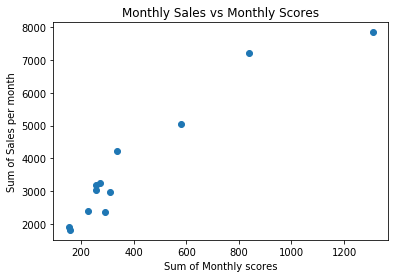

In [41]:
# plot a scatter plot to show correlation
plt.scatter(w,d)
plt.title('Monthly Sales vs Monthly Scores',size=12)
plt.ylabel('Sum of Sales per month')
plt.xlabel('Sum of Monthly scores')
plt.show()

### Correlation between Yearly scores and Yearly Sales

Lets check the correlation between yearly scores and the yearly sales. The expected outcome is that the more games that are released per month the more scores there should be. The expected correlation should be positive as it makes sense that the more games released by year increases the score counts by year. 

In [42]:
# yearly scores sum stored in q
q = combined.groupby(combined.index.strftime('%Y'))['score'].sum()
# yearly global sales stored in f
f = combined.groupby(combined.index.strftime('%Y'))['Global_Sales'].sum()


In [43]:
# use np.corrcoef to find the correlation between yearly scores and yearly sales
np.corrcoef(f,q)

array([[ 1.        ,  0.89826326],
       [ 0.89826326,  1.        ]])

So now we used strftime to convert the index to a Year string and find the sum of the scores and the sum of the global sales per year. As seen above we use np.corrcoef to find the correlation matrix. We are finding the correltion matrix between global sales vs the scores by year. We will then plot the results of the findings below. We are plotting the global sales sum with the scores sum. Yearly sales will be on the Y axis and the scores on the X axis. As we can see below the graph is pretty linear meaning there is a correlation. 

In [44]:
# pre define the colours that are going to be used on the scatter plot
colors = ("red","green")

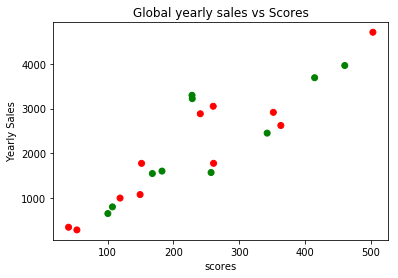

In [45]:
# plot the scatter plot and use the pre defined colours to plot
plt.scatter(f,q,  c=colors )
plt.title('Global yearly sales vs Scores')
plt.xlabel('scores')
plt.ylabel('Yearly Sales')
plt.show()

### Correlation between Games made vs Sales

So far we have found a correlation between global sales and the yearly scores. What we want to analyse and visualise now is if there is a correlation between the games made by year vs the sales made by year. The obvious result is that the more games there is made per year the more sales there will be. The expected correlation should be positive because the more games made the higher the sales should be. 

In [46]:
# count the number of game released per year
g = combined.groupby(combined.index.strftime('%Y'))['Genre'].count()


In [47]:
# sum the global sales for a yearly basis
s = combined.groupby(combined.index.strftime('%Y'))['Global_Sales'].sum()


In [48]:
# again use np.corrcoef to find the correlation between games made and the global sales
np.corrcoef(s,g)

array([[ 1.        ,  0.91084335],
       [ 0.91084335,  1.        ]])

Again there is a strong positive correlation meaning that the more games released per year the more sales there are. The correlation is at 0.91 meaning that the more games released the higher the sales which is expected. Once again we used strftime to count the number of games released by year then we used it again to find the total global sales by year. Yearly sales in terms of millions is on the Y axis and games by year is on the X axis.

In [49]:
# pre define the colours need to be used 
color = ("yellow","blue")

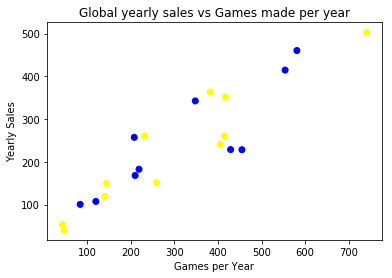

In [50]:
# plot a scatter plot of the correlation and use the pre defined colours
plt.scatter(g,s,  c=color )
plt.title('Global yearly sales vs Games made per year')
plt.xlabel('Games per Year')
plt.ylabel('Yearly Sales')
plt.show()

In [ ]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())